In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("../models/training_data_large/prod_data_20130723v.txt", sep=" ", usecols=[0,1,2,3,4,5], index_col = 0, header = None, names = ["time","mp","bidpx_","bidsz_","askpx_","asksz_",])

In [4]:
% matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [4]:
df.describe()

,mp,bidpx_,bidsz_,askpx_,asksz_
count,53925.000000,53925.000000,53925.000000,53925.000000,53925.000000
mean,4454.464574,4453.968938,358.003338,4455.023051,525.266018
std,12.066856,12.063785,359.181982,12.069943,568.057954
min,4436.220342,4436.000000,10.000000,4437.000000,10.000000
25%,4444.336422,4444.000000,140.000000,4445.000000,160.000000
50%,4452.756202,4452.000000,270.000000,4453.000000,320.000000
75%,4462.674338,4462.000000,440.000000,4463.000000,690.000000
max,4489.438054,4489.000000,12420.000000,4490.000000,3610.000000


In [7]:
df.index[0]

43274820

In [8]:
df.index[-1]

71999993

In [14]:
df.iloc[-1]

mp        4451.578018
bidpx_    4451.000000
bidsz_     350.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71999993, dtype: float64

In [27]:
df.iloc[-4]

mp        4451.524934
bidpx_    4451.000000
bidsz_     320.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71998488, dtype: float64

In [18]:
diff_df = df.diff()

In [19]:
diff_df.describe()

,mp,bidpx_,bidsz_,askpx_,asksz_
count,53924.000000,53924.000000,53924.000000,53924.000000,53924.000000
mean,-0.000625,-0.000631,0.006120,-0.000631,-0.004822
std,0.098591,0.146669,129.519668,0.150784,132.141165
min,-2.150004,-3.000000,-12410.000000,-2.000000,-3340.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.966846,2.000000,12410.000000,2.000000,3270.000000


In [21]:
lagged_df = df.shift(1)

In [22]:
lagged_df.iloc[-1]

mp        4451.578018
bidpx_    4451.000000
bidsz_     350.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71999993, dtype: float64

In [28]:
lagged_df.iloc[-3]

mp        4451.524934
bidpx_    4451.000000
bidsz_     320.000000
askpx_    4452.000000
asksz_     100.000000
Name: 71998990, dtype: float64

In [10]:
lagged_df.index[-1]

71999993

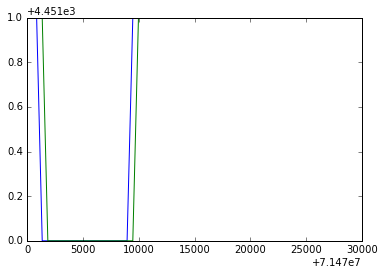

In [40]:
plt.plot(df["bidpx_"].iloc[-1000:-950])
plt.plot(lagged_df["bidpx_"].iloc[-1000:-950])

In [48]:
ask_to_bid = df["askpx_"] - lagged_df["bidpx_"]

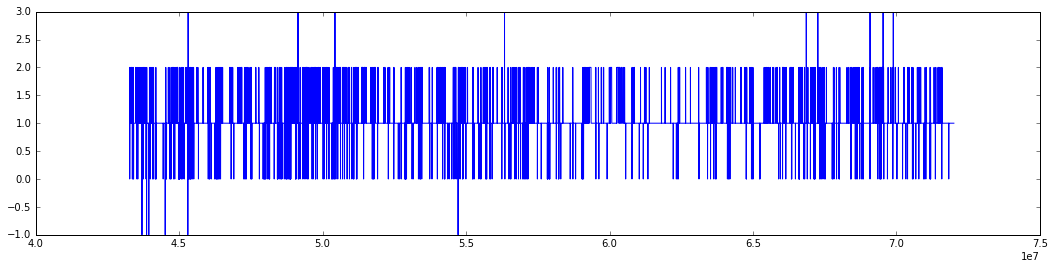

In [49]:
plt.figure(figsize=(18, 4))
plt.plot(ask_to_bid)

In [50]:
bid_to_ask = df["bidpx_"] - lagged_df["askpx_"]

In [60]:
log_ret_buy = df["bidpx_"].apply(np.log) - lagged_df["askpx_"].apply(np.log)

In [75]:
log_ret_bid = df["bidpx_"].apply(np.log) - lagged_df["bidpx_"].apply(np.log)

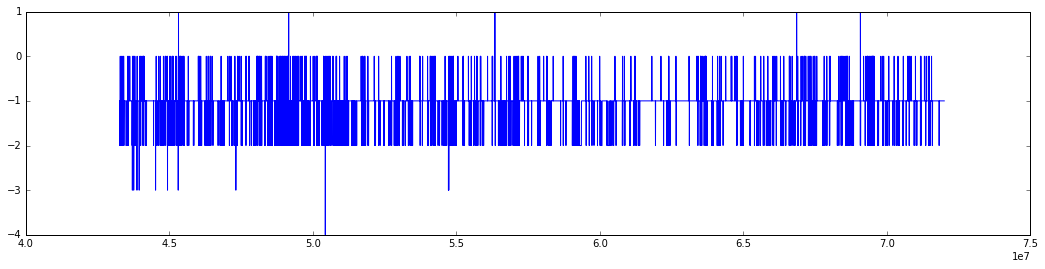

In [51]:
plt.figure(figsize=(18, 4))
plt.plot(bid_to_ask)

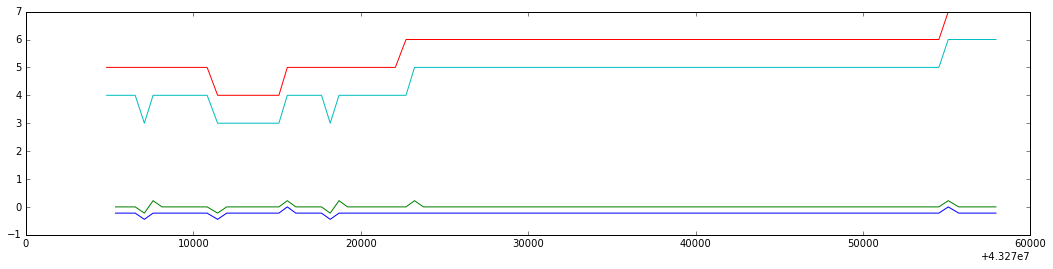

In [77]:
plt.figure(figsize=(18, 4))
plt.plot(log_ret_buy.iloc[0:100]*1000)
plt.plot(log_ret_bid.iloc[0:100]*1000)
#plt.plot(log_ret_buy.cumsum().iloc[0:500]*1000)
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:100]-4481)

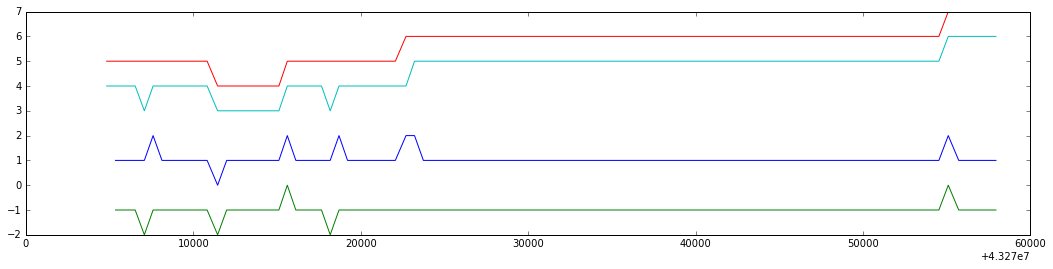

In [58]:
plt.figure(figsize=(18, 4))
plt.plot(ask_to_bid.iloc[0:100])
plt.plot(bid_to_ask.iloc[0:100])
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:100]-4481)

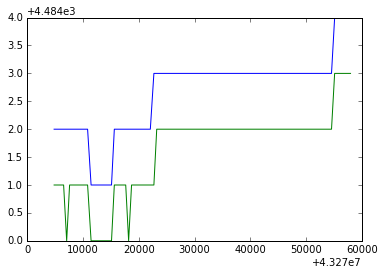

In [56]:
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:100])

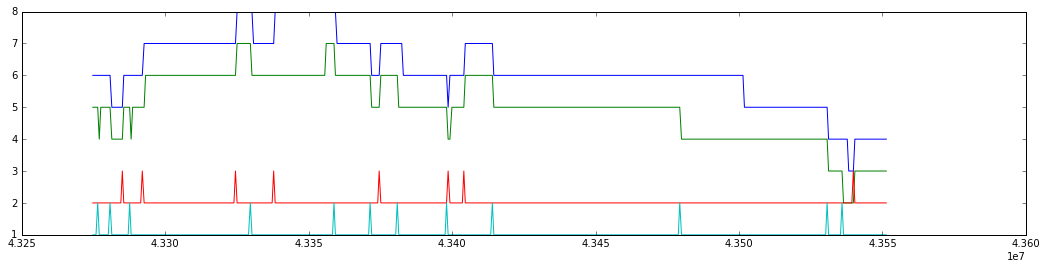

In [43]:
plt.figure(figsize=(18, 4))
#plt.plot((df["askpx_"]-df["bidpx_"]).diff().iloc[0:200]+2)
#plt.plot(df.diff()[["askpx_", "bidpx_"]].iloc[0:300])
# plt.plot(df.diff()["bidpx_"].iloc[0:300])
# plt.plot(df.diff()["askpx_"].iloc[0:300]+2)
# plt.plot(df.diff().shift(-1)["bidpx_"].iloc[0:250])
# plt.plot(df.diff().shift(-1)["askpx_"].iloc[0:250]+2)
plt.plot(df[["askpx_", "bidpx_"]].iloc[0:500]-4480)
plt.plot(inflection_points_buy.iloc[0:500]+2)
plt.plot(inflection_points_sell.iloc[0:500]+1)

In [6]:
inflection_points_buy = df["askpx_"].diff().shift(-1) > 0

In [7]:
inflection_points_sell = df["bidpx_"].diff().shift(-1) < 0

In [90]:
df['Buy'] = np.zeros(df.shape[0])
df['Sell'] = np.zeros(df.shape[0])
df['Buy Close'] = np.zeros(df.shape[0])
df['Sell Close'] = np.zeros(df.shape[0])

comission = 0.0

buy_iterator = inflection_points_buy.iteritems()

#print(df[df['Sell']==1])

max_count = 0

for idx_buy, val_buy in buy_iterator:
    if max_count > 10000:
        break
    sell_iterator = inflection_points_sell.loc[idx_buy:].iteritems()
    if df[df['Sell Close']==1].empty:
        can_open = True
    else:
        can_open = idx_buy > df[df['Sell Close']==1].index[-1]
#         print("Idx:", idx_buy)
#         print("Last buy:", df[df['Sell']==1].index[-1])
#         print(can_open)
    max_count += 1
    if val_buy and can_open:
        print("Buy candidate at {} with price {}".format(idx_buy, df["askpx_"][idx_buy]))
        # sell_candidate = sell_iterator.next()
        for idx_sell, val_sell in sell_iterator:
            if idx_sell > idx_buy: # and val_sell:
                if df["askpx_"][idx_sell] < df["askpx_"][idx_buy] and inflection_points_buy[idx_sell]:
                    print("Better buy candidate at {} with price {}, break...".format(idx_sell, df["askpx_"][idx_sell]))
                    break
                            
                if df["bidpx_"][idx_sell] > (df["askpx_"][idx_buy] + comission) and val_sell:
                    # print("Sell candidate at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    df['Buy'][idx_buy] = 1
                    df['Sell Close'][idx_sell] = 1
                    print("Buy at {} with price {}".format(idx_buy, df["askpx_"][idx_buy]))
                    print("Sell at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    break

sell_iterator = inflection_points_sell.iteritems()
max_count = 0
                    
for idx_sell, val_sell in sell_iterator:
    if max_count > 10000:
        break
    buy_iterator = inflection_points_buy.loc[idx_sell:].iteritems()
    if df[df['Buy Close']==1].empty:
        can_open = True
    else:
        can_open = idx_sell > df[df['Buy Close']==1].index[-1]
#         print("Idx:", idx_buy)
#         print("Last buy:", df[df['Sell']==1].index[-1])
#         print(can_open)
    max_count += 1
    if val_sell and can_open:
        print("Sell candidate at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
        # sell_candidate = sell_iterator.next()
        for idx_buy, val_buy in buy_iterator:
            if idx_buy > idx_sell: # and val_sell:
                if df["bidpx_"][idx_buy] > df["bidpx_"][idx_sell] and inflection_points_sell[idx_buy]:
                    print("Better sell candidate at {} with price {}, break...".format(idx_buy, df["bidpx_"][idx_buy]))
                    break
                            
                if df["askpx_"][idx_buy] < (df["bidpx_"][idx_sell] - comission) and val_buy:
                    # print("Sell candidate at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    df['Buy Close'][idx_buy] = 1
                    df['Sell'][idx_sell] = 1
                    print("Buy at {} with price {}".format(idx_buy, df["askpx_"][idx_buy]))
                    print("Sell at {} with price {}".format(idx_sell, df["bidpx_"][idx_sell]))
                    break

Buy candidate at 43285110 with price 4485.0
Buy at 43285110 with price 4485.0
Sell at 43329720 with price 4487.0
Buy candidate at 43337846 with price 4487.0
Better buy candidate at 43374613 with price 4486.0, break...
Buy candidate at 43374613 with price 4486.0
Better buy candidate at 43398637 with price 4485.0, break...
Buy candidate at 43398637 with price 4485.0
Buy at 43398637 with price 4485.0
Sell at 43414057 with price 4486.0
Buy candidate at 43539853 with price 4483.0
Buy at 43539853 with price 4483.0
Sell at 43707157 with price 4486.0
Buy candidate at 43711906 with price 4485.0
Buy at 43711906 with price 4485.0
Sell at 43754533 with price 4486.0
Buy candidate at 43760433 with price 4485.0
Buy at 43760433 with price 4485.0
Sell at 43819669 with price 4489.0
Buy candidate at 43823794 with price 4489.0
Better buy candidate at 43873826 with price 4485.0, break...
Buy candidate at 43873826 with price 4485.0
Better buy candidate at 43968323 with price 4483.0, break...
Buy candidate a

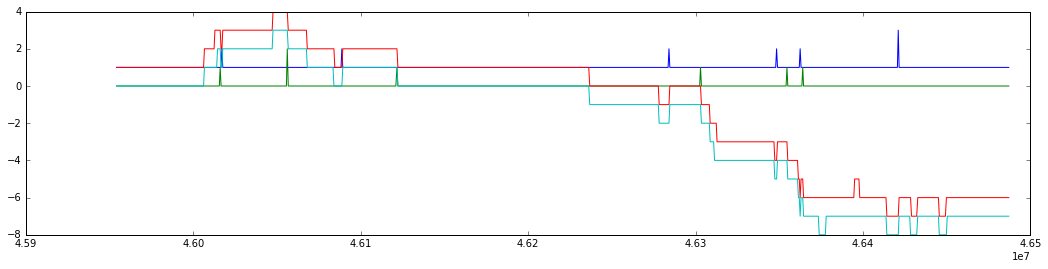

In [97]:
points = 1000
start_point = 5000

plt.figure(figsize=(18, 4))
plt.plot(df["Buy"].iloc[start_point:start_point+points]+df["Buy Close"].iloc[start_point:start_point+points]+1)
#plt.plot(df["Buy Close"].iloc[start_point:start_point+points]+1)
plt.plot(df["Sell"].iloc[start_point:start_point+points]+df["Sell Close"].iloc[start_point:start_point+points])
#plt.plot(df["Sell Close"].iloc[start_point:start_point+points])
plt.plot(df[["askpx_", "bidpx_"]].iloc[start_point:start_point+points]-4470)
# plt.plot(df.diff().shift(-1)["bidpx_"].iloc[0:points]-5)
# plt.plot(df.diff().shift(-1)["askpx_"].iloc[0:points]-3)
# plt.plot(inflection_points_buy.iloc[start_point:start_point+points]-10)
# plt.plot(inflection_points_sell.iloc[start_point:start_point+points]-11)

In [106]:
type(inflection_points_buy)

pandas.core.series.Series

In [89]:
df.diff()

,mp,bidpx_,bidsz_,askpx_,asksz_
time,,,,,
43274820,NaN,NaN,NaN,NaN,NaN
43275348,-0.030460,0,0,0,20
43275936,-0.012336,0,-10,0,0
43276526,0.000000,0,0,0,0
43277073,-0.265920,-1,290,0,0
43277595,0.299490,1,-260,0,0
43278125,-0.010096,0,-10,0,0
43278668,0.062596,0,10,0,0
43279186,0.000000,0,0,0,0


In [90]:
df.diff().shift(-1)

,mp,bidpx_,bidsz_,askpx_,asksz_
time,,,,,
43274820,-0.030460,0,0,0,20
43275348,-0.012336,0,-10,0,0
43275936,0.000000,0,0,0,0
43276526,-0.265920,-1,290,0,0
43277073,0.299490,1,-260,0,0
43277595,-0.010096,0,-10,0,0
43278125,0.062596,0,10,0,0
43278668,0.000000,0,0,0,0
43279186,0.000000,0,0,0,0
